# TF Reegression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
x_data = np.linspace(0.0, 10, 1000000)

In [3]:
noise = np.random.randn(len(x_data))

In [4]:
noise.shape

(1000000,)

y = mx + b

b = 5

In [5]:
y_true = (0.5 * x_data) + 5 + noise

In [6]:
x_df = pd.DataFrame(data=x_data, columns=["X Data"])

In [7]:
y_df = pd.DataFrame(data=y_true, columns=["Y"])

In [8]:
my_data = pd.concat([x_df, y_df], axis=1)

In [9]:
my_data.head()

,X Data,Y
0,0.00000,5.772349
1,0.00001,3.605899
2,0.00002,4.869768
3,0.00003,3.439744
4,0.00004,4.794919


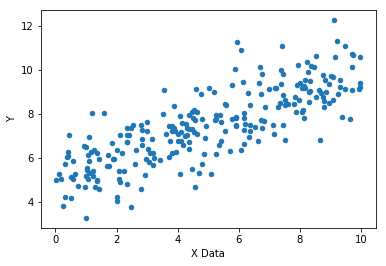

In [10]:
my_data.sample(250).plot(kind="scatter", x="X Data", y="Y")

In [11]:
batch_size = 8

In [12]:
np.random.randn(2)

array([0.77515961, 0.00302318])

In [13]:
m = tf.Variable(-0.95)
b = tf.Variable(-0.92)

Instructions for updating:
Colocations handled automatically by placer.


In [14]:
xph = tf.placeholder(tf.float32, [batch_size])

In [15]:
yph = tf.placeholder(tf.float32, [batch_size])

In [16]:
y_model = m*xph + b

In [17]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [18]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

In [19]:
train = optimizer.minimize(error)

In [20]:
init = tf.global_variables_initializer()

In [21]:
with tf.Session() as sess:
    sess.run(init)
    batches = 10000
    
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data), size=batch_size)
        feed = {xph:x_data[rand_ind], yph:y_true[rand_ind]}
        
        sess.run(train, feed_dict = feed)
        
    model_m, model_b = sess.run([m, b])
        

In [22]:
model_m

0.5320095

In [23]:
model_b

4.9509077

In [24]:
y_hat = x_data*model_m + model_b

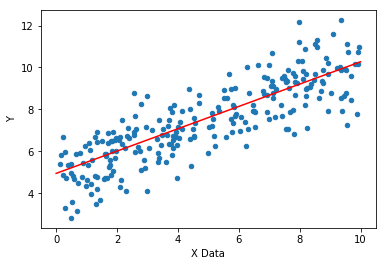

In [25]:
my_data.sample(250).plot(kind="scatter", x="X Data", y="Y")
plt.plot(x_data, y_hat, "r")

# TF Estimator API

In [35]:
feat_cols = [tf.feature_column.numeric_column("x", shape=[1])]

In [36]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpumu4mrgl', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f5e58fa3d68>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [37]:
from sklearn.model_selection import train_test_split

In [40]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data, y_true, test_size=0.3, random_state=101)

In [41]:
y_eval.shape

(300000,)

In [42]:
input_func = tf.estimator.inputs.numpy_input_fn({"x":x_train}, y_train, batch_size=8, num_epochs=None, shuffle=True)

In [43]:
train_input_func = tf.estimator.inputs.numpy_input_fn({"x":x_train}, y_train, batch_size=8, num_epochs=1000, shuffle=False)

In [44]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({"x":x_eval}, y_eval, batch_size=8, num_epochs=1000, shuffle=False)

In [48]:
estimator.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpumu4mrgl/model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 11000 into /tmp/tmpumu4mrgl/model.ckpt.
INFO:tensorflow:loss = 7.258588, step = 11001
INFO:tensorflow:global_step/sec: 1318.55
INFO:tensorflow:loss = 13.683258, step = 11101 (0.077 sec)
INFO:tensorflow:global_step/sec: 1566.43
INFO:tensorflow:loss = 8.307489, step = 11201 (0.063 sec)
INFO:tensorflow:global_step/sec: 1643.76
INFO:tensorflow:loss = 10.929941, step = 11301 (0.061 sec)
INFO:tensorflow:global_step/sec: 1784.45
INFO:tensorflow:loss = 5.9698963, step = 11401 (0.056 sec)
INFO:tensorflow:global_step/sec: 1767.21
INFO:tensorflow:loss = 6.638857, step = 11501 (0.057 sec)
INFO:tensorflow:global_step/sec: 1654.94
INFO:tensorflow:loss = 

In [49]:
train_metrics = estimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-21T20:23:53Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpumu4mrgl/model.ckpt-12000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-03-21-20:23:54
INFO:tensorflow:Saving dict for global step 12000: average_loss = 1.0185596, global_step = 12000, label/mean = 7.507774, loss = 8.148477, prediction/mean = 7.490716
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1

In [50]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-21T20:25:20Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpumu4mrgl/model.ckpt-12000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-03-21-20:25:22
INFO:tensorflow:Saving dict for global step 12000: average_loss = 0.98212916, global_step = 12000, label/mean = 7.4856424, loss = 7.8570333, prediction/mean = 7.472719
INFO:tensorflow:Saving 'checkpoint_path' summary for global ste

In [51]:
print("TRAINING DATA METRICS")
print(train_metrics)

TRAINING DATA METRICS
{'average_loss': 1.0185596, 'label/mean': 7.507774, 'loss': 8.148477, 'prediction/mean': 7.490716, 'global_step': 12000}


In [52]:
print("EVAL METRICS")
print(eval_metrics)

EVAL METRICS
{'average_loss': 0.98212916, 'label/mean': 7.4856424, 'loss': 7.8570333, 'prediction/mean': 7.472719, 'global_step': 12000}


In [53]:
brand_new_data = np.linspace(0, 10, 10)
input_fn_predict = tf.estimator.inputs.numpy_input_fn({"x":brand_new_data}, shuffle=False)

In [54]:
estimator.predict(input_fn=input_fn_predict)

<generator object EstimatorV2.predict at 0x7f5e58f68e58>

In [55]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpumu4mrgl/model.ckpt-12000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.999041], dtype=float32)},
 {'predictions': array([5.5524974], dtype=float32)},
 {'predictions': array([6.1059537], dtype=float32)},
 {'predictions': array([6.65941], dtype=float32)},
 {'predictions': array([7.2128663], dtype=float32)},
 {'predictions': array([7.766322], dtype=float32)},
 {'predictions': array([8.319778], dtype=float32)},
 {'predictions': array([8.873235], dtype=float32)},
 {'predictions': array([9.426691], dtype=float32)},
 {'predictions': array([9.980148], dtype=float32)}]

In [56]:
predictions = []

for  pred in estimator.predict(input_fn=input_fn_predict):
    predictions.append(pred["predictions"])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpumu4mrgl/model.ckpt-12000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [57]:
predictions

[array([4.999041], dtype=float32),
 array([5.5524974], dtype=float32),
 array([6.1059537], dtype=float32),
 array([6.65941], dtype=float32),
 array([7.2128663], dtype=float32),
 array([7.766322], dtype=float32),
 array([8.319778], dtype=float32),
 array([8.873235], dtype=float32),
 array([9.426691], dtype=float32),
 array([9.980148], dtype=float32)]

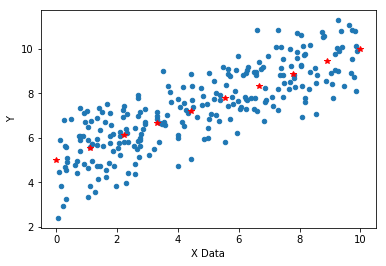

In [60]:
my_data.sample(n=250).plot(kind="scatter", x="X Data", y="Y")
plt.plot(brand_new_data, predictions, "r*")